##  Pyber

**Observed Trends**
* Urban areas have a higher concentration of drivers and fare counts, making up 63% of total revenue. 
* However, 30% of all fares come from suburban areas, where only 19% of all drivers are located.
* Most common fare prices hover around 22 and 28 dollars in Urban areas, and between 28 and 33 dollars in suburban areas.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os
import seaborn as sns

In [61]:
#Read csv file for city data
csvpath = os.path.join("city_data.csv")
city = pd.read_csv(csvpath)
city.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [62]:
#Group by city/type to aggregate driver_count (to remove driver_count duplicate)
city_total = pd.DataFrame(city.groupby(['city','type'], as_index=True)['driver_count'].sum())
city_total.reset_index(inplace=True)
city_total.columns=['city','type','driver_count']
#city_total.head()

In [63]:
#Read csv file for ride data
csv_ride = os.path.join("ride_data.csv")
rides = pd.read_csv(csv_ride)
rides.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [64]:
#Calc avg fare per city and total number of rides
avg_fare = pd.DataFrame(rides.groupby('city')['fare'].mean())
avg_fare.reset_index(inplace=True)
avg_fare.columns=['city','avg_fare']
fare_count = pd.DataFrame(rides.groupby('city')['ride_id'].count())
fare_count.reset_index(inplace=True)
fare_count.columns=['city','fare_count']
ride_total = pd.merge(avg_fare, fare_count, on="city",how='left')
#ride_total.head()

In [66]:
#Merge tables
combined_table = pd.merge(ride_total, city_total, on="city", how="left")
combined_table.columns=['city', 'avg_fare', 'fare_count', 'type', 'driver_count']
#combined_table.head()

In [71]:
#Create color coding for type
colors = {'type': ['Urban', 'Suburban', 'Rural'], 'color': ['lightblue','coral','gold']}

#Convert to color df to merge into combined_table df
colors_df = pd.DataFrame(colors)
colors_df.reset_index(inplace=False)
colors_df.columns=['color','type']
#colors_df

In [72]:
#Merge into final table to create scatter plot
combo_color = pd.merge(combined_table, colors_df, on="type", how="left")
combo_color.head()

,city,avg_fare,fare_count,type,driver_count,color
0,Alvarezhaven,23.928710,31,Urban,21,lightblue
1,Alyssaberg,20.609615,26,Urban,67,lightblue
2,Anitamouth,37.315556,9,Suburban,16,coral
3,Antoniomouth,23.625000,22,Urban,21,lightblue
4,Aprilchester,21.981579,19,Urban,49,lightblue


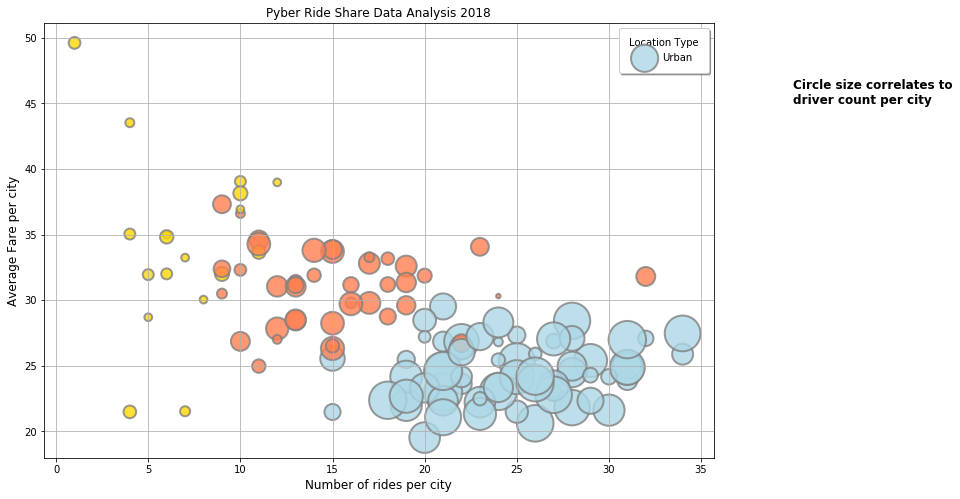

In [69]:
#Create scatter plot
plt.figure(figsize=(12,8))
sct = plt.scatter(combo_color['fare_count'], 
                  combo_color['avg_fare'], 
                  s=combo_color['driver_count']*20,
                  c=combo_color['color'],
                  alpha=0.8, 
                  linewidths=2,
                  edgecolors='grey')
plt.xlabel("Number of rides per city", fontsize='large')
plt.ylabel("Average Fare per city", fontsize='large')
plt.title("Pyber Ride Share Data Analysis 2018")
plt.text(40, 45, "Circle size correlates to\ndriver count per city", 
         horizontalalignment='left', 
         size='large', color='black', 
         weight='bold')

plt.legend(combo_color['type'], title='Location Type', fancybox=True, shadow=True, borderpad=1)

plt.grid(True)
plt.show()

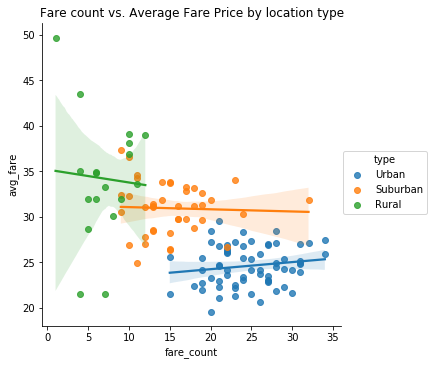

In [409]:
#Linear Regression:  Fare count vs. Avg Fare by location type
g = sns.lmplot(x="fare_count", y="avg_fare", hue= "type", size=5,
               truncate=True, data=combo_color)
plt.title("Fare count vs. Average Fare Price by location type")
plt.show()

In [410]:
#Pie Charts**
#Create combined table to extract required data
total_fare = pd.DataFrame(rides.groupby('city')['fare'].sum())
total_fare.reset_index(inplace=True)
total_fare.columns=['city','total_fare']
pie_total = pd.merge(total_fare, fare_count, on="city",how='left')

combined_pie_table = pd.merge(pie_total, city_total, on="city", how="left") 
#combined_pie_table.head()

In [411]:
#Calc total
#Total Fares by City Type
ttl_fare = combined_pie_table['total_fare'].sum()
print('Total revenue: $', round(ttl_fare))

#Total Rides by City Type
ttl_rides = combined_pie_table['fare_count'].sum()
print('Total number of rides:', ttl_rides)

#Total Drivers by City Type
ttl_drivers = combined_pie_table['driver_count'].sum()
print('Total number of drivers:', ttl_drivers)

Total revenue: $ 63651
Total number of rides: 2375
Total number of drivers: 3349


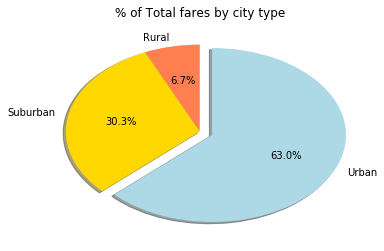

In [412]:
#Calc % of total fare by city type
city_fare = round(pd.DataFrame(combined_pie_table.groupby('type')['total_fare'].sum()/ttl_fare*100),1)
#print(city_fare)
plt.pie(city_fare, labels=['Rural','Suburban','Urban'], shadow=0.4, autopct='%1.1f%%', startangle=90, explode=(0,0,0.1),
        colors=['coral','gold','lightblue'])
plt.title("% of Total fares by city type")
plt.show()

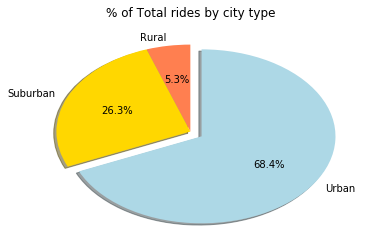

In [413]:
#Calc % of total rides by city type
city_rides = round(pd.DataFrame(combined_pie_table.groupby('type')['fare_count'].sum()/ttl_rides*100),1)
#print(city_rides)
plt.pie(city_rides, labels=['Rural','Suburban','Urban'], shadow=0.4, autopct='%1.1f%%', startangle=90, explode=(0,0,0.1),
        colors=['coral','gold','lightblue'])
plt.title("% of Total rides by city type")
plt.show()

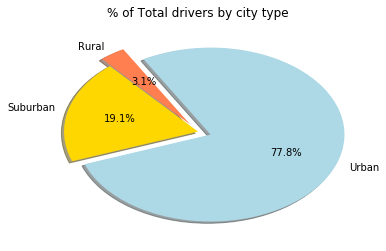

In [414]:
#Calc % of total drivers by city type
type_drivers = round(pd.DataFrame(combined_pie_table.groupby('type')['driver_count'].sum()/ttl_drivers*100),1)
#print(type_drivers)
plt.pie(type_drivers, labels=['Rural','Suburban','Urban'], shadow=0.4, autopct='%1.1f%%', startangle=120, explode=(0.1,0,0.1),
        colors=['coral','gold','lightblue'])
plt.title("% of Total drivers by city type")
plt.show()